In [ ]:
Use Linear Regression to predict Auto MPG Data Set  given at:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [1]:
from datascience import *
import numpy as np
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plots
#import seaborn as sns
plots.style.use('fivethirtyeight')

In [2]:
r = 0.6
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo

In [3]:
def trial_line():
    plots.figure(figsize=(7,7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x_demo, y_demo, s=10)
    #plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
    plots.plot([-4,4],[-4,4], color='r', lw=2)
    #plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.xlabel('x in standard units')
    plots.ylabel('y in standard units');

In [4]:
def trial_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)

In [5]:
def both_with_vertical():
    trial_line()
    plots.plot([1.5,1.5], [-4,4], color='k', lw=2)
    plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)

In [6]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.figure(figsize=(7, 7))
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    plots.scatter(x, y, s=10)
    plots.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plots.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plots.plot([-4,4], [4,-4], lw=2, color='r')

In [7]:
autompg=pd.read_fwf(r"C:\Users\yvrka\Downloads\auto-mpg.data",sep='\t',names=['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin','CarName'])


autompg.drop('CarName',axis=1,inplace=True)
autompg=autompg.replace('?',np.NaN)
autompg[autompg.isnull().any(axis=1)]
autompg=autompg.apply(lambda x: x.fillna(x.median()),axis=0)
#galton.info()
autompg['Horsepower']=autompg['Horsepower'].astype('float64')
#autompg.head()


autompgMain=Table.from_df(autompg, keep_index=False)
autompgMain

MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18,8,307,130,3504,12,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11,70,1
16,8,304,150,3433,12,70,1
17,8,302,140,3449,10.5,70,1
15,8,429,198,4341,10,70,1
14,8,454,220,4354,9,70,1
14,8,440,215,4312,8.5,70,1
14,8,455,225,4425,10,70,1
15,8,390,190,3850,8.5,70,1


In [8]:
avg_auto=(autompgMain.column('Displacement')+autompgMain.column('Horsepower')+autompgMain.column('Weight')+autompgMain.column('Acceleration'))/4

avg_auto

array([ 988.25 , 1054.875,  978.75 ,  974.75 ,  975.375, 1244.5  ,
       1259.25 , 1243.875, 1278.75 , 1109.625, 1031.5  , 1029.25 ,
       1080.125,  944.   ,  648.75 ,  785.375,  771.375,  722.   ,
        582.375,  499.625,  721.625,  660.375,  647.875,  620.125,
        738.   , 1301.   , 1224.5  , 1230.875, 1311.875,  582.375,
        627.375,  612.5  ,  564.125,  744.75 ,  946.125,  923.625,
        913.875,  908.875, 1184.   , 1262.625, 1167.875, 1144.25 ,
       1382.375, 1332.   , 1431.75 ,  835.875,  659.75 ,  911.75 ,
        872.875,  610.5  ,  585.75 ,  560.625,  560.875,  482.   ,
        443.   ,  502.5  ,  534.125,  625.375,  580.125,  607.125,
        664.375,  612.625, 1200.25 , 1243.   , 1154.125, 1161.5  ,
       1034.375, 1320.25 , 1255.125, 1244.875, 1256.125,  627.625,
       1089.625, 1137.25 , 1188.   , 1139.75 ,  795.125,  681.5  ,
        801.375,  593.   ,  654.75 ,  623.5  ,  684.375,  589.25 ,
        575.375, 1159.5  , 1034.375, 1124.   , 1123.875, 1064.

In [9]:
autompgMain_1 = autompgMain.with_column('averaged',avg_auto )
autompgMain_1

MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,averaged
18,8,307,130,3504,12,70,1,988.25
15,8,350,165,3693,11.5,70,1,1054.88
18,8,318,150,3436,11,70,1,978.75
16,8,304,150,3433,12,70,1,974.75
17,8,302,140,3449,10.5,70,1,975.375
15,8,429,198,4341,10,70,1,1244.5
14,8,454,220,4354,9,70,1,1259.25
14,8,440,215,4312,8.5,70,1,1243.88
14,8,455,225,4425,10,70,1,1278.75
15,8,390,190,3850,8.5,70,1,1109.62


In [10]:
autompgMain2 = Table().with_column('averaged2', autompgMain_1.column('averaged'))

autompgMain2

averaged2
988.25
1054.88
978.75
974.75
975.375
1244.5
1259.25
1243.88
1278.75
1109.62


In [11]:
autompgMain3 = autompgMain2.with_column('speed', autompgMain_1.column('Acceleration'))
autompgMain3

averaged2,speed
988.25,12
1054.88,11.5
978.75,11
974.75,12
975.375,10.5
1244.5,10
1259.25,9
1243.88,8.5
1278.75,10
1109.62,8.5


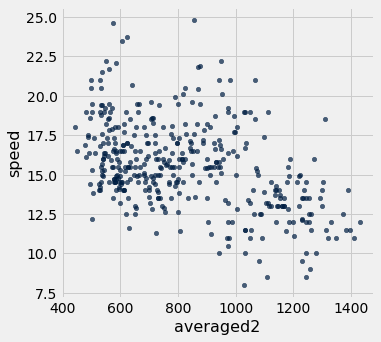

In [12]:
autompgMain3.scatter('averaged2')

In [13]:
def predict(x):
    chosen = autompgMain3.where('averaged2', are.between(x - 0.5, x + 0.5))
    return np.average(chosen.column('speed'))

In [14]:
predictions = autompgMain3.apply(predict, 'averaged2')

In [15]:
autompgMain3 = autompgMain3.with_column(
    'Original Prediction', predictions
)

In [16]:
autompgMain3

averaged2,speed,Original Prediction
988.25,12,12
1054.88,11.5,11.5
978.75,11,11
974.75,12,12
975.375,10.5,10.5
1244.5,10,11.75
1259.25,9,9
1243.88,8.5,8.5
1278.75,10,10
1109.62,8.5,8.5


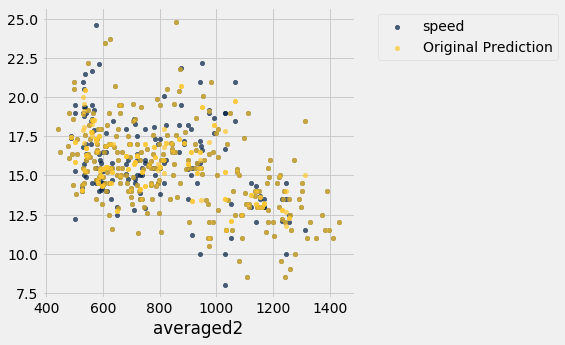

In [17]:
autompgMain3.scatter('averaged2')

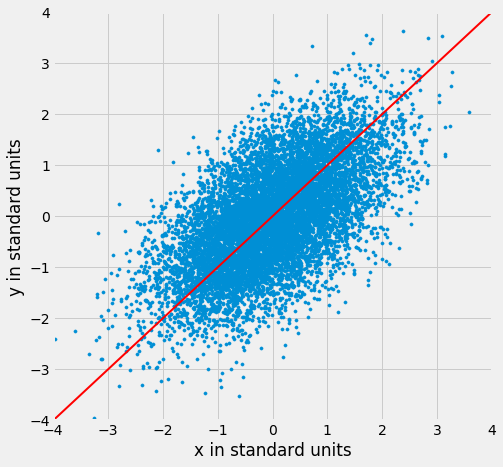

In [18]:
trial_line()

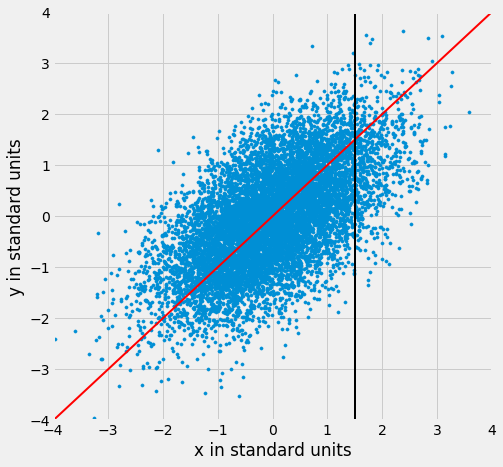

In [19]:
trial_with_vertical()

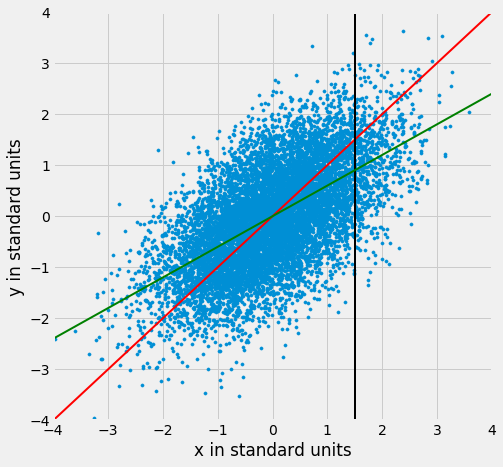

In [20]:
both_with_vertical()

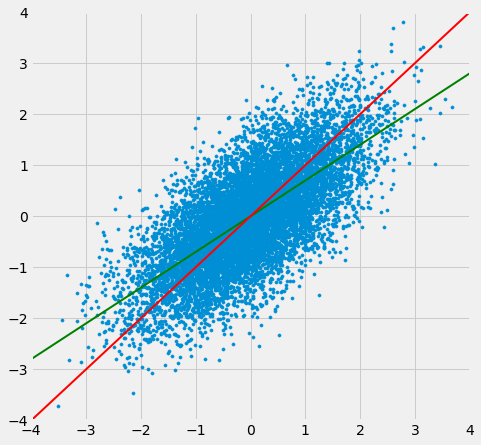

In [21]:
r = 0.7
regression_line(r)

In [22]:
def standard_units(x):
    return (x - np.average(x))/np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.average(x_su * y_su)

def slope(t, x, y):
    r = correlation(t, x, y)
    return r * np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    a = slope(t, x, y)
    return np.average(t.column(y)) - a*np.average(t.column(x))

In [23]:
autompgMain3

averaged2,speed,Original Prediction
988.25,12,12
1054.88,11.5,11.5
978.75,11,11
974.75,12,12
975.375,10.5,10.5
1244.5,10,11.75
1259.25,9,9
1243.88,8.5,8.5
1278.75,10,10
1109.62,8.5,8.5


In [24]:
autompg_slope = slope(autompgMain3, 'averaged2', 'speed')
autompg_intercept = intercept(autompgMain3, 'averaged2', 'speed')
autompg_slope, autompg_intercept

(-0.005010550882702381, 19.681405261622366)

In [25]:
autompgMain3.take(135)

averaged2,speed,Original Prediction
989.875,16.5,16.5


In [26]:
autompg_slope * 69.48 + autompg_intercept

19.333272186292206

In [27]:
def fitted_values(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

In [28]:
regression_predictions = fitted_values(autompgMain3, 'averaged2', 'speed')

In [29]:
autompgMain3 = autompgMain3.with_column(
    'Regression Prediction', regression_predictions
)

In [30]:
autompgMain3

averaged2,speed,Original Prediction,Regression Prediction
988.25,12,12,14.7297
1054.88,11.5,11.5,14.3959
978.75,11,11,14.7773
974.75,12,12,14.7974
975.375,10.5,10.5,14.7942
1244.5,10,11.75,13.4458
1259.25,9,9,13.3719
1243.88,8.5,8.5,13.4489
1278.75,10,10,13.2742
1109.62,8.5,8.5,14.1216


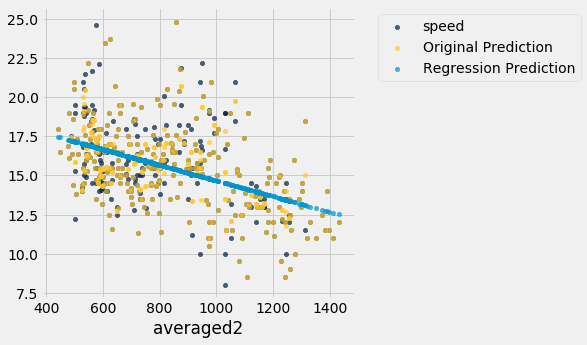

In [31]:
autompgMain3.scatter('averaged2')

In [32]:
x_mean = 70
x_sd = 10
y_mean = 50
y_sd = 12
r = 0.75

In [33]:
midterm_score = 90
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

68.0

In [34]:
midterm_score = 60
x = midterm_score
(((x - x_mean) / x_sd) * r * y_sd) + y_mean

41.0

In [35]:
# y = a * x + b
a = r * (y_sd / x_sd)
b = y_mean - a * x_mean

In [36]:
a * 90 + b

68.0

In [37]:
a * 60 + b

41.0

In [38]:
#autompgMain3 = autompgMain2.with_column('speed', autompgMain_1.column('Acceleration'))
autompgMain3 = autompgMain2.with_column('speed', autompgMain_1.column('Acceleration'))
autompgMain3

averaged2,speed
988.25,12
1054.88,11.5
978.75,11
974.75,12
975.375,10.5
1244.5,10
1259.25,9
1243.88,8.5
1278.75,10
1109.62,8.5


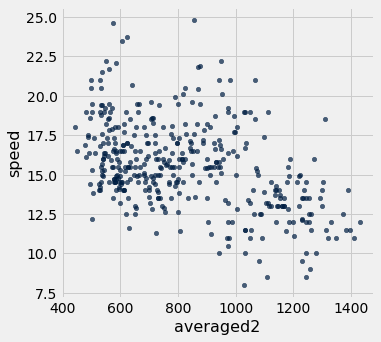

In [39]:
autompgMain3.scatter(0, 1)

In [40]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.average(any_numbers)) / np.std(any_numbers)

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)."""
    r = correlation(t, x, y)
    return r * np.std(t.column(y)) / np.std(t.column(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)."""
    return np.mean(t.column(y)) - slope(t, x, y) * np.mean(t.column(x))

In [41]:
correlation(autompgMain3, 0, 1)

-0.44384637164045154

In [42]:
a = slope(autompgMain3, 0, 1)
b = intercept(autompgMain3, 0, 1)

a * autompgMain3.column(0) + b



array([14.72972835, 14.3959004 , 14.77732859, 14.79737079, 14.79423919,
       13.44577469, 13.37186906, 13.44890628, 13.27416332, 14.12157274,
       14.51302203, 14.52429577, 14.26938399, 14.95144523, 16.43081038,
       15.74624386, 15.81639157, 16.06378752, 16.76338569, 17.17800878,
       16.06566648, 16.37256272, 16.43519461, 16.5742374 , 15.98361871,
       13.16267856, 13.54598571, 13.51404344, 13.10818882, 16.76338569,
       16.5379109 , 16.61244285, 16.85482824, 15.94979749, 14.94079781,
       15.0535352 , 15.10238807, 15.12744083, 13.74891302, 13.35495845,
       13.82970815, 13.94808241, 12.75494499, 13.00735149, 12.50754904,
       15.49321104, 16.37569432, 15.11303549, 15.30782066, 16.62246395,
       16.74647508, 16.87236517, 16.87111254, 17.26631974, 17.46173122,
       17.16360344, 17.00514477, 16.547932  , 16.77465943, 16.63937456,
       16.35252052, 16.61181653, 13.66749156, 13.45329051, 13.89860322,
       13.86165041, 14.49861669, 13.06622546, 13.39253758, 13.44

In [43]:
def linear_fit(t, x, y):
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a * t.column(x) + b

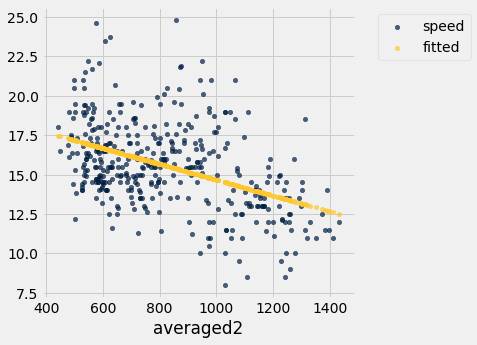

In [44]:
hi_fitted = autompgMain3.with_column(
    'fitted',
    linear_fit(autompgMain3, 0, 1)
)
hi_fitted.scatter(0)

In [45]:
#autompgMain2 = Table().with_column('averaged2', autompgMain_1.column('averaged'))

sample = [[72.75, 73.2], [69.5, 68], [71, 73.5], [62, 60]]
def hi_errors(slope, intercept):
    print('Slope:    ', np.round(slope), 'averaged2')
    print('Intercept:', np.round(intercept), 'speed')
    autompgMain3.scatter('averaged2', 'speed')
    xlims = np.array([60, 73])
    plots.plot(xlims, slope * xlims + intercept, lw=2)
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=2)

Slope:     1.0 averaged2
Intercept: 20 speed


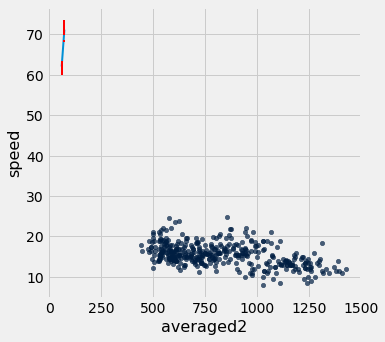

In [46]:
hi_errors(0.7, 20)

Slope:     -0.0 averaged2
Intercept: 95 speed


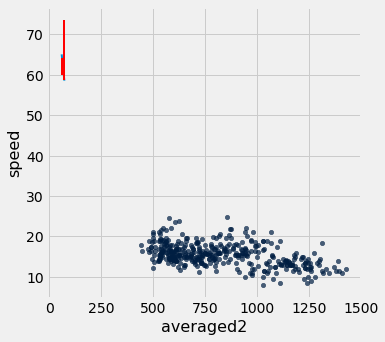

In [47]:
hi_errors(-0.5, 95)

In [48]:
def hi_rmse(slope, intercept):
    hi_errors(slope, intercept)
    x = autompgMain3.column('averaged2')
    y = autompgMain3.column('speed')
    predicted = slope * x + intercept
    mse = np.mean((y - predicted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

Slope:     1 averaged2
Intercept: 10 speed
Root mean squared error: 851.4365674302533


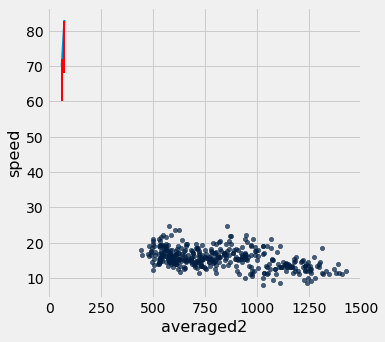

In [49]:
hi_rmse(1, 10)

Slope:     -50 averaged2
Intercept: 20000 speed
Root mean squared error: 24339.11182196049


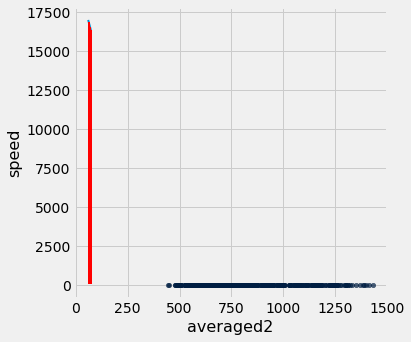

In [50]:
hi_rmse(-50, 20000)

Slope:     90 averaged2
Intercept: 4000 speed
Root mean squared error: 80905.21317058547


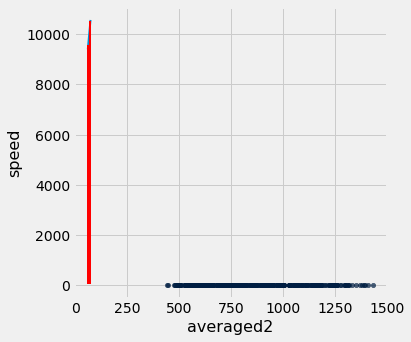

In [51]:
hi_rmse(90, 4000)

Slope:     -0.0 averaged2
Intercept: 20.0 speed
Root mean squared error: 2.4680665921992624


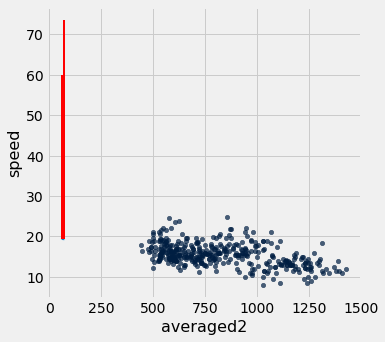

In [52]:
hi_rmse(slope(autompgMain3, 0, 1), intercept(autompgMain3, 0, 1))

In [53]:
def f(x):
    return (x - 3) ** 2 + 1

In [54]:
[f(1), f(2), f(3), f(4), f(5)]

[5, 2, 1, 2, 5]

In [55]:
minimize(f)

2.999999999968361

In [56]:
f(minimize(f))

1.0

In [57]:
f(3)

1

In [58]:
f(3.1)

1.01

In [59]:
f(2.9)

1.01

In [60]:
def lw_mse(any_slope, any_intercept):
    x = autompgMain3.column(0)
    y = autompgMain3.column(1)
    predicted = any_slope * x + any_intercept
    return np.mean((y - predicted) ** 2)

Slope:     50 averaged2
Intercept: 10000 speed
Root mean squared error: 52469.031542429766


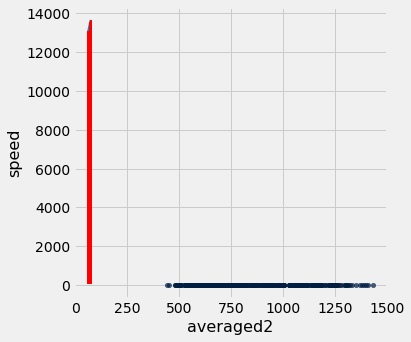

In [61]:
hi_rmse(50, 10000)

In [62]:
minimize(lw_mse)

array([-5.01055090e-03,  1.96814053e+01])

In [63]:
slope(autompgMain3, 0, 1)

-0.005010550882702381

In [64]:
intercept(autompgMain3, 0, 1)

19.681405261622366